___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7


#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](attachment:./www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

# Завантаження датасету

In [16]:
import pandas as pd

df = pd.read_csv('loan_data.csv')

# Огляд датасету

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [18]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [19]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


# Візуалізація 

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

## Частота рейтингів позичальників в залежності від повности оплати

In [21]:
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]

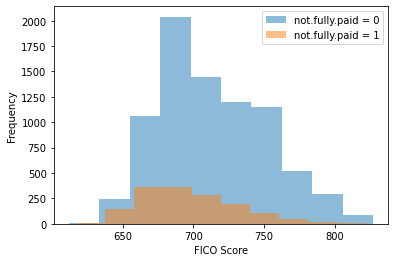

In [22]:
plt.hist(df_0['fico'], alpha=0.5, label='not.fully.paid = 0')
plt.hist(df_1['fico'], alpha=0.5, label='not.fully.paid = 1')
plt.legend(loc='upper right')

plt.xlabel('FICO Score')
plt.ylabel('Frequency')

plt.show()

## Зв'язок між рейтингом FICO та процентною ставкою

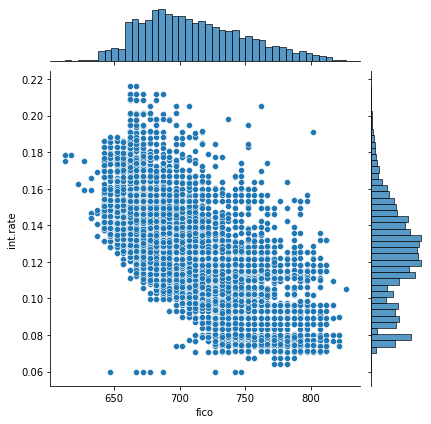

In [23]:
sns.jointplot(x='fico', y='int.rate', data=df)
plt.show()

### Висновок: зв'язок є, обернений. Чим вищий рейтинг - тим нижча процентна ставка. Логічно пояснюється роботою банка.

## Зв'язок між рейтингом FICO та процентною ставкою при врахуванні цільової функції - відповідності кліента до критеріїв

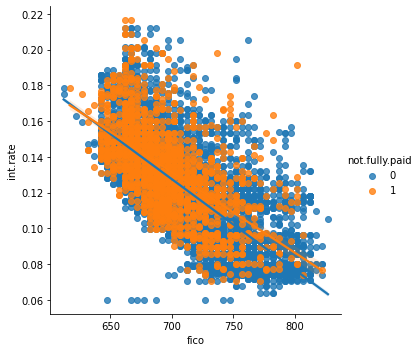

In [24]:
sns.lmplot(x='fico', y='int.rate', hue='not.fully.paid', data=df)

plt.show()

### Висновок: чітко прослідковується від'ємна кореляція показників таких як рейтинг та процентна ставка. Більшість "НЕГІДНИХ" кліентів мають низький рейтинг

# Підготовка моделей класифікації

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier


from sklearn.preprocessing import StandardScaler, MinMaxScaler


from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import plot_tree

## Логістична регресія

In [26]:
def logistic(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    f1_CV = f1_scores.mean()

    return report, accuracy, precision, recall, f1, f1_CV

## Логістична регресія з стандартизацією

In [27]:
def logistic_standart(X, y):
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    f1_CV = f1_scores.mean()

    return report, accuracy, precision, recall, f1, f1_CV

## Логістична регресія з мін-макс

In [28]:
def logistic_minmax(X, y):
    
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    f1_CV = f1_scores.mean()

    return report, accuracy, precision, recall, f1, f1_CV

## Дерево рішень

In [29]:
def decision_tree(X, y, purpose = 'Test'):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    f1_CV = f1_scores.mean()

    if purpose == 'Test':
        return report, accuracy, precision, recall, f1, f1_CV
    else:
        fig, ax = plt.subplots(figsize=(100, 100))
        plot_tree(model, ax=ax)
        fig.savefig('decision_tree.png')

## Випадковий ліс

In [30]:
def random_forest(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    f1_CV = f1_scores.mean()

    return report, accuracy, precision, recall, f1, f1_CV

### XGBoost

In [31]:
def xgboost(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    f1_CV = f1_scores.mean()

    return report, accuracy, precision, recall, f1, f1_CV

## М'який voting

In [32]:
def soft_voting(X, y):
    model1 = LogisticRegression(random_state=1)
    model2 = DecisionTreeClassifier(random_state=1)
    model3 = RandomForestClassifier(random_state=1)
    model4 = xgb.XGBRFClassifier()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('rf', model3), ('xg', model4)], voting='soft')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    f1_CV = f1_scores.mean()

    return report, accuracy, precision, recall, f1, f1_CV

## Жорсткий voting

In [33]:
def hard_voting(X, y):
    model1 = LogisticRegression(random_state=1)
    model2 = DecisionTreeClassifier(random_state=1)
    model3 = RandomForestClassifier(random_state=1)
    model4 = xgb.XGBRFClassifier()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('rf', model3), ('xg', model4)], voting='hard')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    f1_CV = f1_scores.mean()

    return report, accuracy, precision, recall, f1, f1_CV

# Тестування моделей

In [34]:
import warnings

warnings.filterwarnings("ignore")

In [35]:
def testing(X, y):
    model = []
    matrix = []
    accuracy = []
    precision = []
    recall = []
    f1 = []
    f1_CV = []

    model.append('Логістична регресія')
    result = logistic(X, y)
    matrix.append(result[0])
    accuracy.append(result[1])
    precision.append(result[2])
    recall.append(result[3])
    f1.append(result[4])
    f1_CV.append(result[5])    
    
    model.append('Логістична регресія зі стандартизацією')
    result = logistic_standart(X, y)
    matrix.append(result[0])
    accuracy.append(result[1])
    precision.append(result[2])
    recall.append(result[3])
    f1.append(result[4])
    f1_CV.append(result[5])    
    
    model.append('Логістична регресія зі min_max')
    result = logistic_minmax(X, y)
    matrix.append(result[0])
    accuracy.append(result[1])
    precision.append(result[2])
    recall.append(result[3])
    f1.append(result[4])
    f1_CV.append(result[5])    
    
    model.append('Дерево рішень')
    result = decision_tree(X, y)
    matrix.append(result[0])
    accuracy.append(result[1])
    precision.append(result[2])
    recall.append(result[3])
    f1.append(result[4])
    f1_CV.append(result[5])    
    
    model.append('Випадковий ліс')
    result = random_forest(X, y)
    matrix.append(result[0])
    accuracy.append(result[1])
    precision.append(result[2])
    recall.append(result[3])
    f1.append(result[4])
    f1_CV.append(result[5])    
    
    model.append('XGBoost')
    result = xgboost(X, y)
    matrix.append(result[0])
    accuracy.append(result[1])
    precision.append(result[2])
    recall.append(result[3])
    f1.append(result[4])
    f1_CV.append(result[5])    
    
    model.append('Soft voting')
    result = soft_voting(X, y)
    matrix.append(result[0])
    accuracy.append(result[1])
    precision.append(result[2])
    recall.append(result[3])
    f1.append(result[4])
    f1_CV.append(result[5])    
    
    model.append('Hard voting')
    result = hard_voting(X, y)
    matrix.append(result[0])
    accuracy.append(result[1])
    precision.append(result[2])
    recall.append(result[3])
    f1.append(result[4])
    f1_CV.append(result[5])

    result = {
        'model': model,
        'matrix': matrix,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'f1_CV': f1_CV
    }

    return result


# 1 варіант

In [36]:
X = df.drop(columns=['not.fully.paid'], inplace=False)
y = df['not.fully.paid']

In [37]:
X = pd.get_dummies(X, columns=['purpose'])

In [38]:
result = testing(X, y)

[17:03:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:03:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:03:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:03:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [39]:
df_result_1 = pd.DataFrame(result)
df_result_1['variant'] = 1

In [40]:
df_result_1.sort_values(by=['f1_CV', 'f1'])

,model,matrix,accuracy,precision,recall,f1,f1_CV,variant
7,Hard voting,precision recall f1-score ...,0.838205,0.810541,0.838205,0.765437,0.424834,1
2,Логістична регресія зі min_max,precision recall f1-score ...,0.838900,0.796374,0.838900,0.772713,0.424864,1
1,Логістична регресія зі стандартизацією,precision recall f1-score ...,0.838205,0.788904,0.838205,0.773516,0.426172,1
4,Випадковий ліс,precision recall f1-score ...,0.836813,0.773137,0.836813,0.769158,0.427067,1
6,Soft voting,precision recall f1-score ...,0.838205,0.789927,0.838205,0.779685,0.432077,1
5,XGBoost,precision recall f1-score ...,0.826722,0.765907,0.826722,0.779138,0.437188,1
3,Дерево рішень,precision recall f1-score ...,0.736604,0.740428,0.736604,0.738497,0.458177,1
0,Логістична регресія,precision recall f1-score ...,0.838205,0.810541,0.838205,0.765437,0.475102,1


# 2 варіант

In [41]:
X = df.drop(columns=['not.fully.paid', 'delinq.2yrs'], inplace=False)
y = df['not.fully.paid']

In [42]:
X = pd.get_dummies(X, columns=['purpose'])

In [43]:
result = testing(X, y)

[17:04:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:04:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [44]:
df_result_2 = pd.DataFrame(result)
df_result_2['variant'] = 2

In [45]:
df_result_2.sort_values(by=['f1_CV', 'f1'])

,model,matrix,accuracy,precision,recall,f1,f1_CV,variant
7,Hard voting,precision recall f1-score ...,0.838205,0.810541,0.838205,0.765437,0.424050,2
2,Логістична регресія зі min_max,precision recall f1-score ...,0.838900,0.796374,0.838900,0.772713,0.424864,2
1,Логістична регресія зі стандартизацією,precision recall f1-score ...,0.838205,0.788904,0.838205,0.773516,0.426834,2
4,Випадковий ліс,precision recall f1-score ...,0.836813,0.774344,0.836813,0.769768,0.427168,2
6,Soft voting,precision recall f1-score ...,0.836117,0.782240,0.836117,0.780020,0.429830,2
5,XGBoost,precision recall f1-score ...,0.826374,0.765342,0.826374,0.778923,0.441189,2
3,Дерево рішень,precision recall f1-score ...,0.733473,0.743725,0.733473,0.738455,0.456671,2
0,Логістична регресія,precision recall f1-score ...,0.838205,0.810541,0.838205,0.765437,0.475552,2


In [46]:
total_result = pd.concat([df_result_1, df_result_2])

# 3 варіант

In [47]:
from sklearn.decomposition import PCA


In [50]:

for i in range(4, 18):
    X = df.drop(columns=['not.fully.paid'], inplace=False)
    X = pd.get_dummies(X, columns=['purpose'])
    y = df['not.fully.paid']
    pca = PCA(n_components=i)
    X = pca.fit_transform(X)
    result = testing(X, y)
    df_result_i = pd.DataFrame(result)
    df_result_i['variant'] = i
    total_result = pd.concat([total_result, df_result_i])

[17:08:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:08:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:08:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:08:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [52]:
total_result.sort_values(by=['f1'])

,model,matrix,accuracy,precision,recall,f1,f1_CV,variant
3,Дерево рішень,precision recall f1-score ...,0.730689,0.735726,0.730689,0.733176,0.506427,6
3,Дерево рішень,precision recall f1-score ...,0.733125,0.738341,0.733125,0.735698,0.510970,5
3,Дерево рішень,precision recall f1-score ...,0.733473,0.743725,0.733473,0.738455,0.456671,2
3,Дерево рішень,precision recall f1-score ...,0.736604,0.740428,0.736604,0.738497,0.458177,1
3,Дерево рішень,precision recall f1-score ...,0.734516,0.748358,0.734516,0.741162,0.492649,8
...,...,...,...,...,...,...,...,...
0,Логістична регресія,precision recall f1-score ...,0.820459,0.770746,0.820459,0.785007,0.489589,13
0,Логістична регресія,precision recall f1-score ...,0.821155,0.771506,0.821155,0.785468,0.486858,14
0,Логістична регресія,precision recall f1-score ...,0.822199,0.772675,0.822199,0.786160,0.485435,10
0,Логістична регресія,precision recall f1-score ...,0.821851,0.772748,0.821851,0.786303,0.487862,9


# Висновок

####  Кожна модель повертала 6 параметрів: матрицю, accuracy, precision, recall, f1, f1_CV. Порівнюючи по f1, можна сказати, що накрайще впоралися Voting (soft) з вірантом 13 (рса з 13 компонентами), Лог.регресія з варіантом 9 та 10 (рса з 9 та 10 компонентами відповідно)

**Завдання з візуалізацією виконана в pycharm, фото прикріпила у окремому файлі. Графік створювався для варіанту 1**

* ### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [41]:
import pandas as pd
from datetime import datetime

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [42]:
df_new = pd.read_csv(url)

In [43]:
df_new.head(5)

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


## Список міст

In [45]:
list(df_new['city'].unique())

['Paris', 'Antwerpen', 'London']

## Дата початку та дата кінця

In [46]:
date_start = df_new['date.utc'].min()
date_finish = df_new['date.utc'].max()

In [47]:
date_start = datetime.strptime(date_start, '%Y-%m-%d %H:%M:%S%z')
date_finish = datetime.strptime(date_finish, '%Y-%m-%d %H:%M:%S%z')

In [48]:
print('Start: ', date_start.strftime('%Y-%m-%d'))
print('Finish: ', date_finish.strftime('%Y-%m-%d'))

Start:  2019-05-07
Finish:  2019-06-21


## Знаходження днів тижня та годин

In [49]:
days = []
hours = []
for date_str in df_new['date.utc']:
    date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S%z')
    day = date.strftime('%A')
    hour = date.strftime('%H')
    days.append(day)
    hours.append(hour)

df_new['day'] = days
df_new['hour'] = hours
df_new.head(5)
    

,city,country,date.utc,location,parameter,value,unit,day,hour
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,Friday,00
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,Thursday,23
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,Thursday,22
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,Thursday,21
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,Thursday,20


## Середнє для кожного міста

In [50]:
df_city = df_new.groupby(by=['city'])['value'].mean()
df_city = df_city.reset_index()
df_city.head(5)

,city,value
0,Antwerpen,25.778947
1,London,24.777090
2,Paris,27.740538


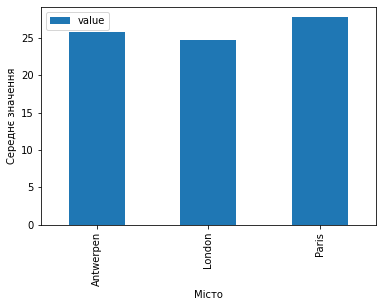

In [51]:
import matplotlib.pyplot as plt

df_city.plot(x='city', y='value', kind='bar')

plt.xlabel('Місто')
plt.ylabel('Середнє значення')

plt.show()

## Середнє для кожного дня тижня

In [52]:
df_day = df_new.groupby(by=['day'])['value'].mean().reset_index()
df_day.head(5)

,day,value
0,Friday,29.003158
1,Monday,24.749342
2,Saturday,25.484058
3,Sunday,23.861905
4,Thursday,26.733219


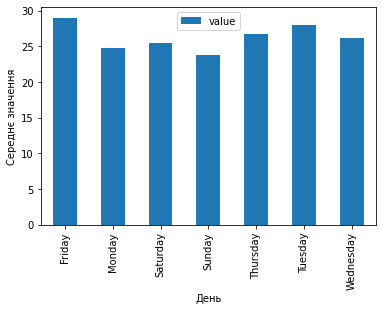

In [53]:
df_day.plot(x='day', y='value', kind='bar')

plt.xlabel('День')
plt.ylabel('Середнє значення')

plt.show()

## Середнє для кожного міста і дня тижня

In [54]:
city_and_day = df_new.groupby(by=['city', 'day'])['value'].mean()
city_and_day

city day 
Antwerpen Friday 28.400000
 Monday 27.875000
 Saturday 33.500000
 Sunday 21.896552
 Thursday 27.500000
 Tuesday 22.214286
 Wednesday 21.125000
London Friday 26.446809
 Monday 23.969697
 Saturday 24.977612
 Sunday 24.859155
 Thursday 24.780142
 Tuesday 24.885714
 Wednesday 23.460432
Paris Friday 31.617986
 Monday 24.856250
 Saturday 25.266154
 Sunday 23.274306
 Thursday 28.600690
 Tuesday 30.999359
 Wednesday 29.165753
Name: value, dtype: float64

In [55]:
df_city_and_day = city_and_day.to_frame().reset_index()
df_city_and_day

,city,day,value
0,Antwerpen,Friday,28.400000
1,Antwerpen,Monday,27.875000
2,Antwerpen,Saturday,33.500000
3,Antwerpen,Sunday,21.896552
4,Antwerpen,Thursday,27.500000
5,Antwerpen,Tuesday,22.214286
6,Antwerpen,Wednesday,21.125000
7,London,Friday,26.446809
8,London,Monday,23.969697
9,London,Saturday,24.977612


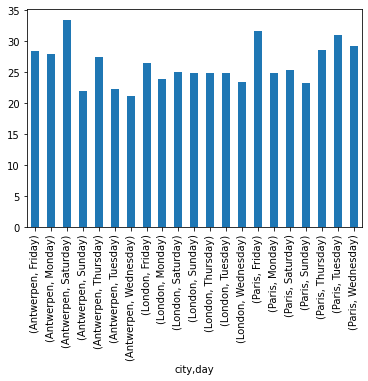

In [56]:
city_and_day.plot(kind = 'bar')
plt.show()

## Середнє для кожної години

In [57]:
df_hours = df_new.groupby(by=['hour'])['value'].mean()
df_hours = df_hours.reset_index()
df_hours.head(5)

,hour,value
0,00,27.955294
1,01,26.125688
2,02,23.558511
3,03,23.242683
4,04,22.979518


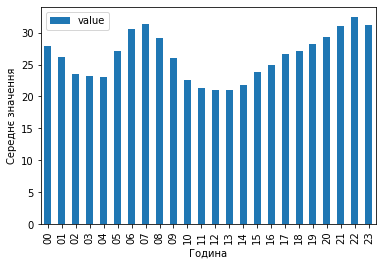

In [58]:
df_hours.plot(x='hour', y='value', kind='bar')

plt.xlabel('Година')
plt.ylabel('Середнє значення')

plt.show()